*Import library's*

In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import tweepy
from os import path
from textblob import TextBlob as tb
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt
import sys
from importlib import reload
import imp
from textblob.classifiers import NaiveBayesClassifier
import os
import re
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
from html.parser import HTMLParser
from bs4 import BeautifulSoup

*Twitter authentication*

In [2]:
consumer_key = 'Jg95VukOglg6RIqRrqt6GYRoa'
consumer_secret = 'ZvH3Oz7jFN0OvDMXGtRriTqOOykGnUgqxAU0wNKWhMElII0ivq'
access_token = '971179238396227584-KkOSGzCwhzv0lokz55Dkp1wTjyurnkW'
access_token_secret = 'y2NNUWU1tlhQYMOps49aSKgckRqTu7T7dPWpyNbMeXvAA'

*Twitter API Login*

In [3]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    alltweets = []
    new_tweets = api.search(screen_name)
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    while len(new_tweets) > 0:
        new_tweets = api.search(screen_name,count=200,max_id=oldest)
        alltweets.extend(new_tweets)
        oldest = alltweets[-1].id - 1
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    return outtweets

*Get all tweets*

In [73]:
public_tweets = get_all_tweets('@falanext')
df = pd.DataFrame(public_tweets, columns=['id','created_at','text'])
df

,id,created_at,text
0,1059737517405208576,2018-11-06 09:21:27,b'@falanext Informa\xc3\xa7\xc3\xa3o incorreta...
1,1059732517643677696,2018-11-06 09:01:35,"b'@falanext Sim, quero trocar minha senha do a..."
2,1059722513675116544,2018-11-06 08:21:50,b'@falanext Como fa\xc3\xa7o para saber quanto...
3,1059722372952064000,2018-11-06 08:21:17,"b'RT @falanext: @MichaelLopes20 Oi, Michael!\n..."
4,1059657292654764033,2018-11-06 04:02:40,b'@falanext Poderia me responder no chat?'
5,1059656531212414976,2018-11-06 03:59:39,b'@falanext Estou aguardando a resposta'
6,1059634958019559429,2018-11-06 02:33:55,b'@falanext Quero saber como posso fazer um de...
7,1059614986560045056,2018-11-06 01:14:34,b'Eu com os carrinhos todos cheios achando que...
8,1059613357827858435,2018-11-06 01:08:05,"b'Meu cart\xc3\xa3o da @falanext chegou, t\xc3..."
9,1059613081632940033,2018-11-06 01:06:59,"b'@falanext E se serve como sugest\xc3\xa3o, ..."


*Data Cleaning*

In [74]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8")
    except:
        clean = stripped
    letters_only = re.sub("[\W]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessary white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:500]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [75]:
data = pd.DataFrame(test_result, columns=['tweet_text'])
data

,tweet_text
0,informação incorreta o atendimento do banco br...
1,sim quero trocar minha senha do app aí chega u...
2,como faço para saber quanto tempo sou cliente ...
3,rt oi michael em que posso te ajudar
4,poderia me responder no chat
5,estou aguardando a resposta
6,quero saber como posso fazer um depã³sito na m...
7,eu com os carrinhos todos cheios achando que m...
8,meu cartão da chegou tão fofa a embalagem
9,e se serve como sugestã o procurem parcerias q...


*Stopwords in portuguese*

In [76]:
stopwords = nltk.corpus.stopwords.words('portuguese')

*Used words*

In [77]:
text = " ".join(tweet for tweet in data.tweet_text)

*WordCloud*

(-0.5, 399.5, 199.5, -0.5)

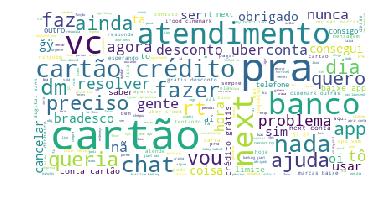

In [78]:
wordcloud = WordCloud(max_font_size=50,stopwords=stopwords,background_color='white').generate(text)
wordcloud.to_file("nouns_user.png")
plt.imshow(wordcloud)
plt.axis("off")

*Counting the words used in the WordCloud*

In [79]:
print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 25000 words in the combination of all tweets.


*Count occurrences of each word*

In [80]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

*Display the occurrences of the words*

In [81]:
counts = []
counts = print(word_count(text))

{'informação': 1, 'incorreta': 1, 'o': 191, 'atendimento': 21, 'do': 65, 'banco': 20, 'bradesco': 10, 'informou': 1, 'que': 92, 'é': 41, 'possível': 2, 'sacar': 2, 'na': 34, 'boca': 3, 'caixa': 2, 'em': 29, 'q': 9, 'sim': 10, 'quero': 12, 'trocar': 1, 'minha': 18, 'senha': 1, 'app': 31, 'aí': 9, 'chega': 3, 'um': 38, 'raio': 1, 'de': 134, 'e': 125, 'mail': 2, 'pedindo': 1, 'para': 20, 'ligar': 4, '0800': 3, 'não': 78, 'f': 2, 'como': 26, 'faço': 2, 'saber': 9, 'quanto': 3, 'tempo': 4, 'sou': 5, 'cliente': 3, 'vocês': 21, 'rt': 27, 'oi': 10, 'michael': 1, 'posso': 6, 'te': 7, 'ajudar': 4, 'poderia': 1, 'me': 50, 'responder': 1, 'no': 55, 'chat': 17, 'estou': 16, 'aguardando': 3, 'a': 91, 'resposta': 5, 'fazer': 16, 'depã³sito': 2, 'conta': 33, 'eu': 46, 'com': 42, 'os': 14, 'carrinhos': 1, 'todos': 2, 'cheios': 1, 'achando': 1, 'meu': 60, 'cartã': 8, 'virava': 1, 'hoje': 7, 'por': 22, 'matou': 1, 'cartão': 75, 'da': 28, 'chegou': 5, 'tão': 1, 'fofa': 1, 'embalagem': 2, 'se': 17, 'serve'

*Transform occurrences in a dataframe*

In [82]:
wordcount = {'word', 'counts'}
wordcount = pd.DataFrame(counts, columns=['word', 'counts'])
wordcount

,word,counts


*Top 10 most used words*

*Top 10 most used words Graphs*

*ReLi Lexicon - portuguese sentimental analysis*

In [83]:
base_path = 'C:/Users/Gabriela/Documents/GitHub/tcc/ReLi-Lex'
train = []
files = [os.path.join(base_path, f) for f in os.listdir(base_path)]

*Read ReLi Lexicon file in directory*

In [84]:
for file in files:
    t = 'pos' if '_Positivos' in file else 'neg'
    with open(file, 'r') as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            train.append((w[1:-1], t))

cl = NaiveBayesClassifier(train)

*Tweets classification in positives and negatives*

In [85]:
dados = {}
orderedPrediction = []
for tweet in data.tweet_text:
   blob = tb(str(tweet), classifier=cl)
   if blob.sentences:
       for s in blob.sentences:
           orderedPrediction.append(s.classify())
   else:
       orderedPrediction.append('N/A')

Add 'sentiment' column in data frame

In [86]:
data['sentiment'] = orderedPrediction
data

,tweet_text,sentiment
0,informação incorreta o atendimento do banco br...,pos
1,sim quero trocar minha senha do app aí chega u...,pos
2,como faço para saber quanto tempo sou cliente ...,pos
3,rt oi michael em que posso te ajudar,pos
4,poderia me responder no chat,pos
5,estou aguardando a resposta,pos
6,quero saber como posso fazer um depã³sito na m...,pos
7,eu com os carrinhos todos cheios achando que m...,pos
8,meu cartão da chegou tão fofa a embalagem,pos
9,e se serve como sugestã o procurem parcerias q...,neg


*Counting positives and negatives*

In [87]:
df = data.groupby('sentiment').count()
df

,tweet_text
sentiment,
N/A,18
neg,79
pos,317


*Sentimental Analysis Graph based on Naive-Bayes Classification*

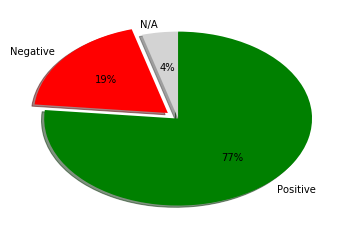

In [88]:
pie_pos = df.loc['pos']
pie_neg = df.loc['neg']
pie_na = df.loc['N/A']

slices = [pie_na, pie_neg, pie_pos]
tweets = ['N/A', 'Negative', 'Positive']
columns = ['LightGrey', 'Red', 'Green']
 
plt.pie(slices, labels = tweets, colors = columns, startangle = 90, shadow = True, explode = (0, 0.1, 0), autopct='%1.0f%%')

plt.show()

*Positive WordCloud*

*Negative WordCloud*